# Одномерная линейная регрессия

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Рассмотрим** приближенную линейную функцию $y=2x-1+\varepsilon(x)$.

Задаем случайный массив $X$ значений на отрезке $[-1,1)$:


In [3]:
N = 100
X = 2*np.random.random(N) - 1
Y0 = 2 * X - 1

# Добавим случайную ошибку со значениями [-0.5, 0.5):

E = (2*np.random.random(N) - 1) * 0.5
Y = Y0 + E

In [6]:
M = 30
temp_x = 1 + 0.25 * np.random.random(M)
temp_y = -2 + 0.25 * np.random.random(M)

In [7]:
temp = X
X = np.empty(N+M, 'd')
X[:N] = temp[:]
X[N:] = temp_x

In [8]:
temp = Y
Y = np.empty(N+M, 'd')
Y[:N] = temp[:]
Y[N:] = temp_y

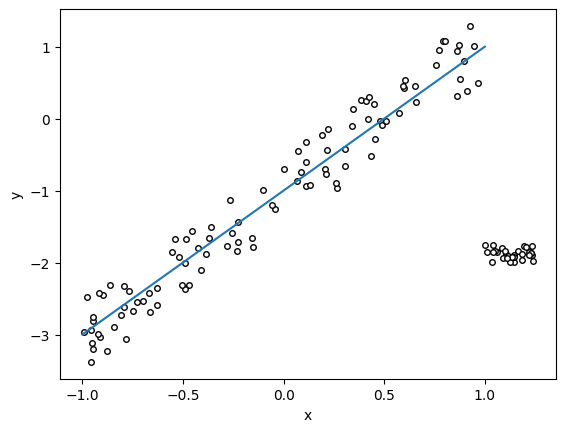

In [9]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
from estimators import *
from models import *
from funcs import *

In [14]:
ls = LinearLS()
ls.fit(X[:,None], Y)

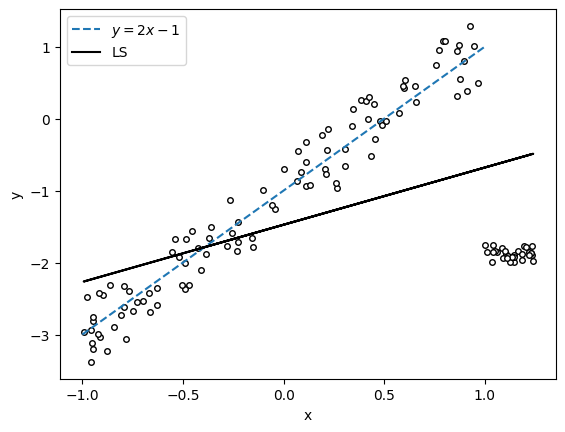

In [15]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1], linestyle='--', label=r"$y=2x-1$")
plt.plot(X, ls.model.evaluate(X[:,None]), color='k', label="LS")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
rho_func = SoftAbs(0.001)
irls = IRLS(rho_func)

irls.fit(X[:,None], Y)
print(irls.model.param)

plt.plot(irls.qvals, marker='o', markersize=4)
plt.show()

In [17]:
irls.fit(X[:,None], Y)
print(irls.model.param)

[-1.19813483  1.56383417]


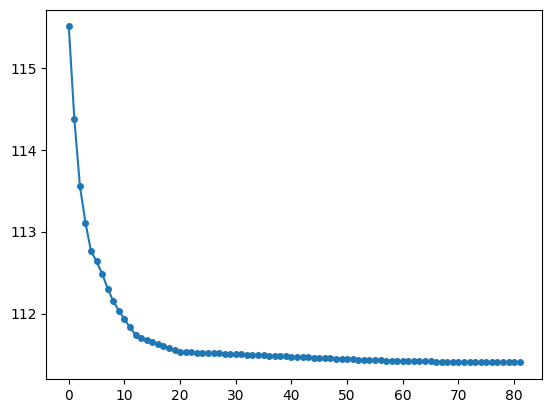

In [18]:
plt.plot(irls.qvals, marker='o', markersize=4)
plt.show()

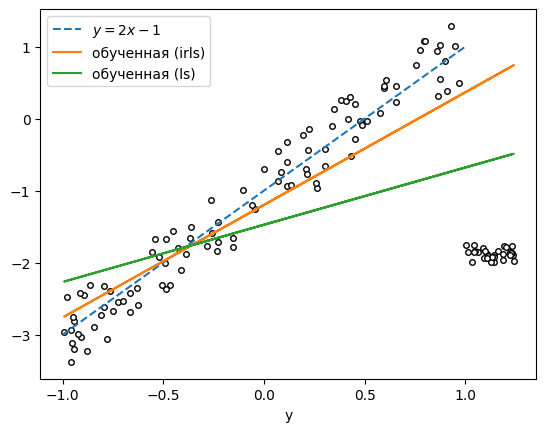

In [19]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1], linestyle='--', label=r'$y=2x-1$')
plt.xlabel('x')
plt.xlabel('y')
plt.plot(X, irls.model.evaluate(X[:,None]), label='обученная (irls)')
plt.plot(X, ls.model.evaluate(X[:,None]), label='обученная (ls)')
plt.legend()
plt.show()

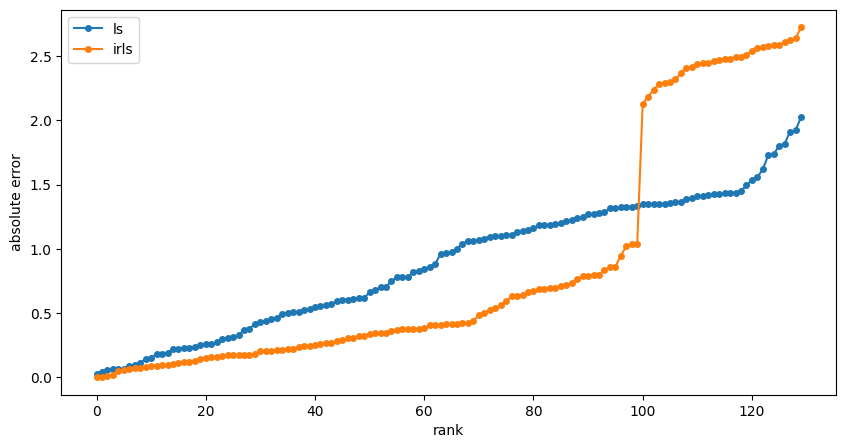

In [20]:
E = abs(Y - ls.model.evaluate(X[:,None]))
E1 = abs(Y - irls.model.evaluate(X[:,None]))

plt.figure(figsize=(10,5))
plt.plot(sorted(E), marker='o', markersize=4, label="ls")
plt.plot(sorted(E1), marker='o', markersize=4, label="irls")
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.legend()
plt.show()

In [21]:
def modified_zscore(X):
    mu = np.median(X)
    sigma = np.median(abs(X - mu))
    return 0.6745 * (X - mu) / sigma

In [22]:
Z = abs(modified_zscore(E))
Z1 = abs(modified_zscore(E1))

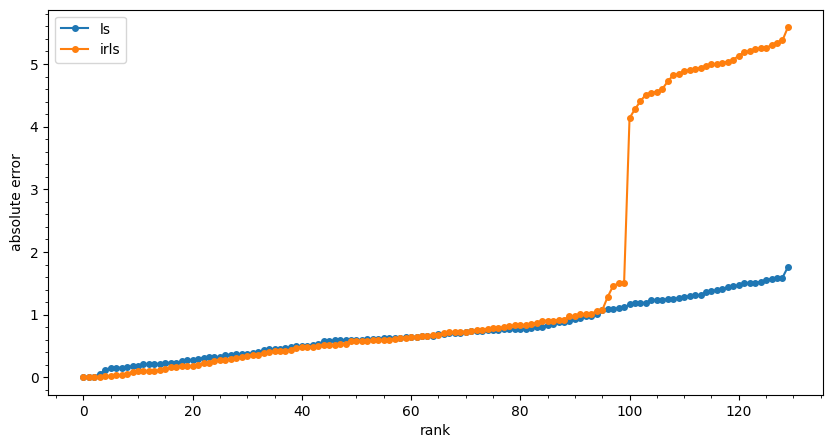

In [23]:
plt.figure(figsize=(10,5))
plt.plot(sorted(Z), marker='o', markersize=4, label="ls")
plt.plot(sorted(Z1), marker='o', markersize=4, label="irls")
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.legend()
plt.minorticks_on()
plt.show()

In [24]:
X1 = X[Z1 < 3]
Y1 = Y[Z1 < 3]

In [25]:
ls2 = LinearLS()
ls2.fit(X1[:,None], Y1)

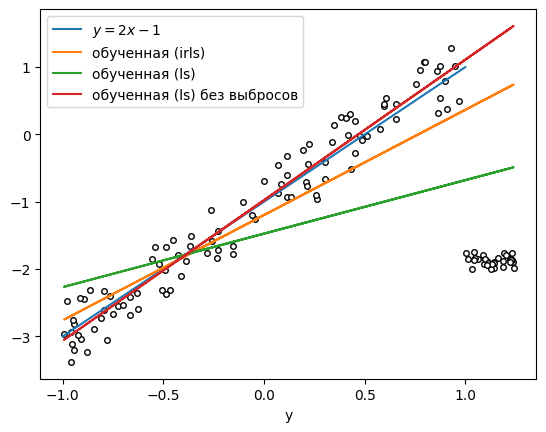

In [26]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1], label=r'$y=2x-1$')
plt.xlabel('x')
plt.xlabel('y')
plt.plot(X, irls.model.evaluate(X[:,None]), label='обученная (irls)')
plt.plot(X, ls.model.evaluate(X[:,None]), label='обученная (ls)')
plt.plot(X, ls2.model.evaluate(X[:,None]), label='обученная (ls) без выбросов')
plt.legend()
plt.show()

# Домашняя работа №2. Датасет animals.csv.

In [42]:
# читаем данные
data = pd.read_csv("/content/animals.csv", sep=",")
data.head(10)

,name,body,brain
0,Mountain beaver,1.35,8.1
1,Cow,465.00,423.0
2,Grey wolf,36.33,119.5
3,Goat,27.66,115.0
4,Guinea pig,1.04,5.5
5,Dipliodocus,11700.00,50.0
6,Asian elephant,2547.00,4603.0
7,Donkey,187.10,419.0
8,Horse,521.00,655.0
9,Potar monkey,10.00,115.0


In [88]:
# посмотрим на зависимость параметров body и brain, логарифируем данные по основанию 2
X = body = np.emath.logn(2, data['body']) # [кг]
Y = brain = np.emath.logn(2, data['brain'] / 1000) # [кг]
name = np.array(data['name'].to_list())

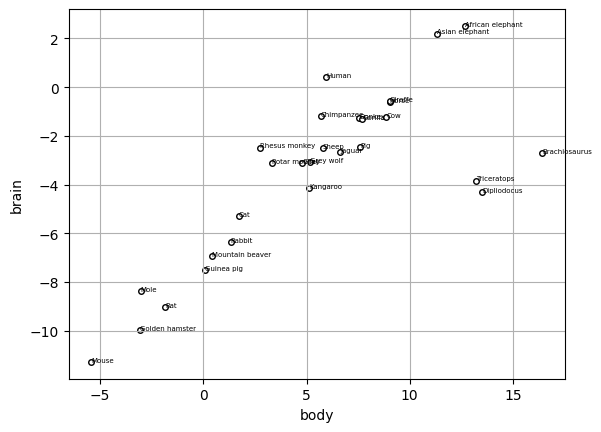

In [72]:
plt.scatter(body, brain, s=16, c='w', edgecolors='k')
plt.xlabel('body')
plt.ylabel('brain')

for itemBody, itemBrain, itemName in zip(body, brain, data['name']):
  plt.text(itemBody, itemBrain, itemName, fontsize=5)

plt.grid(1)
plt.show()

# Мы понимаем, что у нас есть линейная зависимость с 3 или 4 выбросами "на глаз"

In [93]:
ls = LinearLS() # Линейная модель без весов
ls.fit(X[:,None], Y)
mod_ls = ls.model
print(mod_ls.param) # параметры модели

# По аналогии рассмотрим приближенную линейную функцию y = 1.2x - 10, где параметры k и b подобраны по точкам
# (5, -4)
# (0, -10)

N = 100
X_ARG = 1.2*np.random.random(N) - 10
Y0 = 1.2 * X_ARG - 10

# Добавим случайную ошибку со значениями [-0.5, 0.5):

E = (2*np.random.random(N) - 1) * 0.5
Y_ARG = Y0 + E

print(X_ARG[:5], Y_ARG[:5])

[-6.27984542  0.49599469]
[-9.26078998 -9.14057539 -9.34275698 -9.18678942 -8.80237142] [-20.70131624 -20.54879794 -21.61535884 -20.94401694 -20.07127673]


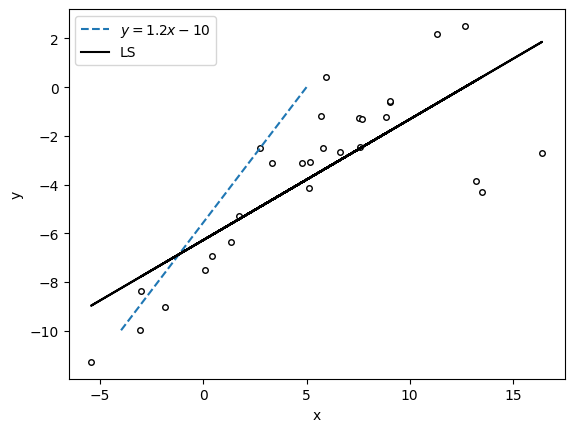

In [90]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([5,-4], [0,-10], linestyle='--', label=r"$y=1.2x-10$")
plt.plot(X, ls.model.evaluate(X[:,None]), color='k', label="LS")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Видим, что модель линейной регрессии показала результаты лучше, чем построенная функция самостоятельно

[-7.25687107  0.74057229]


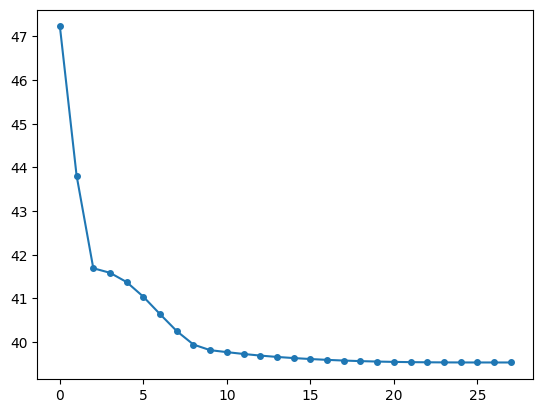

In [91]:
rho_func = SoftAbs(0.001)
irls = IRLS(rho_func)

irls.fit(X[:,None], Y)
print(irls.model.param)

plt.plot(irls.qvals, marker='o', markersize=4)
plt.show()

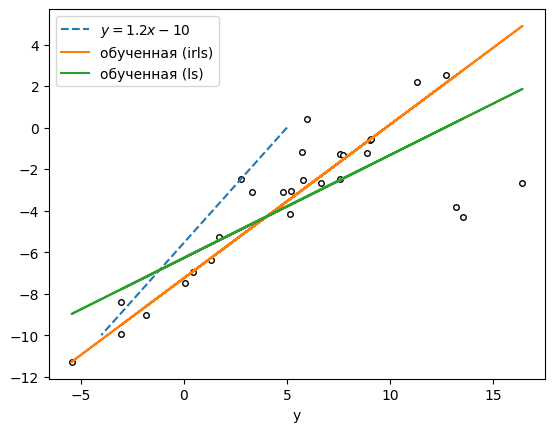

In [97]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([5,-4], [0,-10], linestyle='--', label=r"$y=1.2x-10$")
plt.xlabel('x')
plt.xlabel('y')
plt.plot(X, irls.model.evaluate(X[:,None]), label='обученная (irls)') # метод наименьших квадратов
plt.plot(X, ls.model.evaluate(X[:,None]), label='обученная (ls)')
plt.legend()
plt.show()

# видим, что нам мешают выбросы

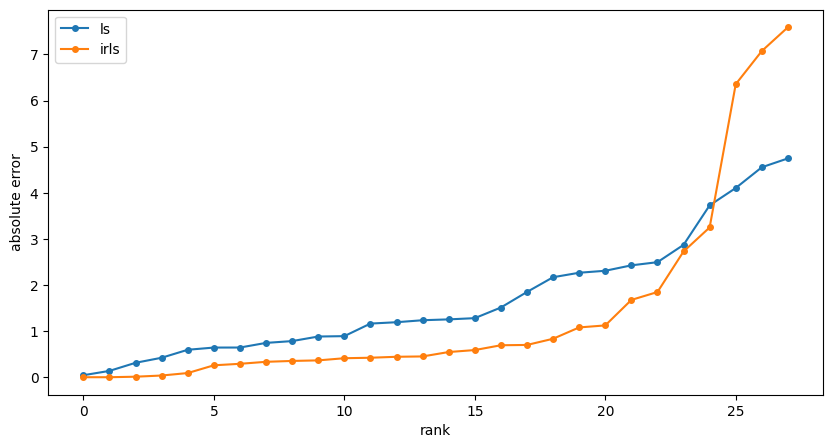

In [98]:
# сравним ошибки
E = abs(Y - ls.model.evaluate(X[:,None]))
E1 = abs(Y - irls.model.evaluate(X[:,None]))

plt.figure(figsize=(10,5))
plt.plot(sorted(E), marker='o', markersize=4, label="ls")
plt.plot(sorted(E1), marker='o', markersize=4, label="irls")
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.legend()
plt.show()

In [105]:
from scores import modified_zscore

def modified_zscore(X):
    mu = np.median(X)
    sigma = np.median(abs(X - mu))
    return 0.6745 * (X - mu) / sigma

Z = abs(modified_zscore(E1))
z_ind = np.argsort(Z)
X1 = X[z_ind[:-3]]
Y1 = Y[z_ind[:-3]]
print(name[z_ind[:-3]])
print(name[z_ind[-3:]])

# отсекли выбросы

# обучаем irlis без выбросов
irls_n = IRLS(rho_func)

irls_n.fit(X[:,None], Y)
print(irls_n.model.param)

['Cow' 'Sheep' 'Golden hamster' 'Rat' 'Donkey' 'Goat' 'African elephant'
 'Grey wolf' 'Jaguar' 'Cat' 'Kangaroo' 'Guinea pig' 'Gorilla' 'Pig'
 'Rabbit' 'Horse' 'Mountain beaver' 'Mouse' 'Giraffe' 'Asian elephant'
 'Mole' 'Potar monkey' 'Chimpanzee' 'Rhesus monkey' 'Human']
['Triceratops' 'Dipliodocus' 'Brachiosaurus']
[-7.25687107  0.74057229]


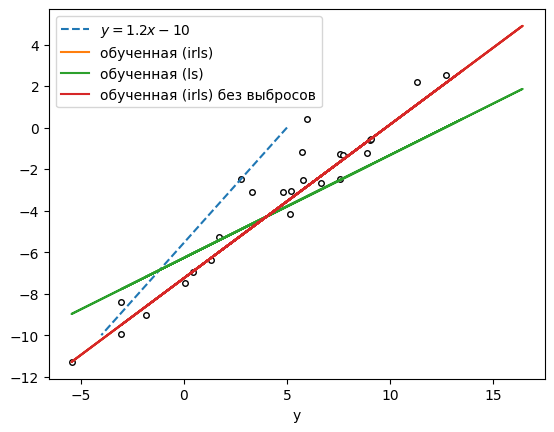

In [108]:
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k')
plt.plot([5,-4], [0,-10], linestyle='--', label=r"$y=1.2x-10$")
plt.xlabel('x')
plt.xlabel('y')
plt.plot(X, irls.model.evaluate(X[:,None]), label='обученная (irls)')
plt.plot(X, ls.model.evaluate(X[:,None]), label='обученная (ls)')
plt.plot(X, irls_n.model.evaluate(X[:,None]), label='обученная (irls) без выбросов')
plt.legend()
plt.show()

# видим, что irlis без выбросов описывает текущие данные наилучшим образом